<a href="https://colab.research.google.com/github/Shahzad-kml/ML1/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
data.isna().sum(), data.dtypes

(carat      0
 cut        0
 color      0
 clarity    0
 depth      0
 table      0
 price      0
 x          0
 y          0
 z          0
 dtype: int64, carat      float64
 cut         object
 color       object
 clarity     object
 depth      float64
 table      float64
 price        int64
 x          float64
 y          float64
 z          float64
 dtype: object)

In [ ]:
print(data.cut.value_counts())
print(data.color.value_counts())
print(data.clarity.value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


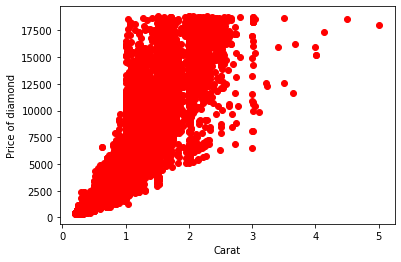

In [ ]:
plt.scatter(data.carat,data.price,color='red')
plt.xlabel('Carat')
plt.ylabel('Price of diamond')
plt.show()

In [ ]:
# data.describe() 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in data:
  if data[i].dtypes=='object':
    data[i]=encoder.fit_transform(data[i])
  else:
    pass

In [ ]:
data.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler as mms
scaler=mms()
scaled_data=scaler.fit_transform(data)
normalized_data=pd.DataFrame(scaled_data, columns=data.columns)

In [ ]:
normalized_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,0.50,0.166667,0.428571,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,0.75,0.166667,0.285714,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,0.25,0.166667,0.571429,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,0.75,0.833333,0.714286,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,0.25,1.000000,0.428571,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478


In [ ]:
normalized_data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.124312,0.638251,0.432366,0.547879,0.520817,0.278023,0.194994,0.533627,0.097360,0.111281
std,0.098547,0.256927,0.283517,0.246370,0.039795,0.042971,0.215680,0.104447,0.019391,0.022192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.500000,0.166667,0.285714,0.500000,0.250000,0.033735,0.438547,0.080136,0.091509
50%,0.103950,0.500000,0.500000,0.571429,0.522222,0.269231,0.112180,0.530726,0.096944,0.111006
75%,0.174636,0.750000,0.666667,0.714286,0.541667,0.307692,0.270219,0.608939,0.111036,0.127044
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x=normalized_data.drop(['price'], axis=1)
y=normalized_data.price

In [ ]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y=tts(x, y, test_size=0.2, random_state=101)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(43152, 9) (43152,) (10788, 9) (10788,)


In [ ]:
from sklearn.svm import SVR
model = SVR()
model.fit(train_x, train_y)
y_pred=model.predict(test_x)
from sklearn.metrics import mean_squared_error as mse
error= np.sqrt(mse(y_pred, test_y))
print(error)

0.05758166654828673


In [ ]:
model2=SVR(kernel='rbf',C=1.0)
model2.fit(train_x, train_y)
y_prediction=model2.predict(test_x)
error2=np.sqrt(mse(y_prediction, test_y))
print(error2)

0.05758166654828673


In [ ]:
model3=SVR(kernel='poly',C=1.0)
model3.fit(train_x, train_y)
y_prediction=model3.predict(test_x)
error2=np.sqrt(mse(y_prediction, test_y))
print(error2)

0.09160203969012498
